# Part I - (Visualizing Ford GoBike Data)
## by (Olamilekan Olugbayila)

## Introduction
> Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Like other bike share programs, Ford GoBike uses a fleet of sturdy, durable bikes that are locked into a system of docking stations spread out over the city. 

> The bikes are perfect for one-way travels because they may be unlocked from one station and returned to any other station in the network. The bikes can be used 365 days a year, seven days a week, and 24 hours a day. Riders who sign up as members or buy passes get access to all the bikes in the network.


## Preliminary Wrangling

> This section explores Ford GoBike's trip data for public containing rides recorded in Feb 2019.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

%matplotlib inline

## Part 1. Load in Dataset & Assessment


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Data Inspection

In [3]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#Inspection of random samples using .sample pandas function

df.sample(30)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
20749,442,2019-02-26 10:54:39.5370,2019-02-26 11:02:02.5330,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,22.0,Howard St at Beale St,37.789756,-122.394643,6526,Subscriber,1984.0,Male,No
180493,705,2019-02-01 10:49:46.8940,2019-02-01 11:01:32.8150,87.0,Folsom St at 13th St,37.769757,-122.415674,343.0,Bryant St at 2nd St,37.783172,-122.393572,4966,Subscriber,1995.0,Male,No
97040,647,2019-02-15 09:20:03.3220,2019-02-15 09:30:50.9690,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,78.0,Folsom St at 9th St,37.773717,-122.411647,6482,Subscriber,1997.0,Male,No
116395,1013,2019-02-12 07:42:07.6180,2019-02-12 07:59:01.4980,52.0,McAllister St at Baker St,37.777416,-122.441838,349.0,Howard St at Mary St,37.781010,-122.405666,4404,Customer,NaN,NaN,No
173412,191,2019-02-03 11:40:40.7670,2019-02-03 11:43:52.3940,357.0,2nd St at Julian St,37.341132,-121.892844,275.0,Julian St at 6th St,37.342997,-121.888889,2829,Subscriber,1992.0,Male,Yes
173864,402,2019-02-03 08:49:52.9030,2019-02-03 08:56:35.6880,205.0,Miles Ave at Cavour St,37.838800,-122.258732,206.0,College Ave at Bryant Ave,37.838127,-122.251271,3262,Subscriber,1989.0,Female,No
54099,328,2019-02-21 13:50:22.6950,2019-02-21 13:55:51.5280,121.0,Mission Playground,37.759210,-122.421339,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,6309,Subscriber,1986.0,Male,No
121082,766,2019-02-11 16:04:28.7100,2019-02-11 16:17:14.7210,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,104.0,4th St at 16th St,37.767045,-122.390833,4611,Customer,1986.0,Male,No
61017,555,2019-02-20 18:01:22.2560,2019-02-20 18:10:37.8510,81.0,Berry St at 4th St,37.775880,-122.393170,22.0,Howard St at Beale St,37.789756,-122.394643,6104,Subscriber,1977.0,Male,No
10896,394,2019-02-27 19:26:45.9660,2019-02-27 19:33:20.7200,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,66.0,3rd St at Townsend St,37.778742,-122.392741,5091,Subscriber,1987.0,Male,No


In [5]:
# Satistical summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# Checking for duplicates in dataset

df.duplicated().sum()

0

In [8]:
# Checking for NaN values

df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Part 2. Cleaning the Dataset

### Quality Issues: (wrong datatype format)
>- Start/end times are not in the timestamp format.
>- [start_station_id, bike_id, end_station_id] in wrong format, -change to object format
>- member birth year format in float, - change to integer format
>- Convert [User type, gender and bike_share_for_all_trip] to category format.

### Enhance Dataset
>- Conversion of trip duration from seconds to minutes to improve human comprehension
>- calculate member's age from member_birth_year data column 
>- add columns for the start month, day of the week, and hour

In [9]:
# Create copy of dataset for cleaning

df_clean = df.copy()

### Define
>- Convert Start/end times to timestamp format
>- Convert Bike ID, start station ID, and end station ID to object format.
>- Convert User type, gender, and bike share for all to category format.

## Code

In [10]:
# Changing the format to datetime format

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)


In [11]:
# Changing the bike_id, start_station_id, and end_station_id to object format

df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [12]:
# Changing the user_type, member_gender, and bike_share_for_all_trip to category format

df_clean.user_type=df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

### Test

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### Enhance Dataset 

### Define
>- Convert ride duration from seconds to minutes 

### Code

In [14]:
# Extracting duration in minutes
#create new column with name 'duration_min' 
# divide 'duration_sec' by 60 to convert to minutes

df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

### Test

In [15]:
df_clean.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608


### Enhance Dataset (Continued)

### Define
>- extract member's age data from member's birth year column

### Code

In [16]:
#create new column name (member_age)
# Subtract member's birth year from current year (2019) to get age

df_clean['member_age'] = 2019 - df_clean['member_birth_year']


In [17]:
#check statistical summary of member's age to observe trend

df_clean.member_age.describe()

#observation: - 75% of dataset population fall under 39 years of age
# - outliers ages exist and could be removed.

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [18]:
# using percentiles function to zoom in on age trends
df_clean.member_age.describe(percentiles=[.99])

#results - 99% of dataset population is below 64years

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: member_age, dtype: float64

In [19]:
#Clean up member's age dataset of outliers to only include ages in range of 64years and below
#using pandas query to isolate ages below or equal to 64 and remove nulls

df_clean = df_clean.query('member_age <= 64')

In [20]:
#convert member's age column datatype to integer format
df_clean.member_age = df_clean.member_age.astype(int)

### Test

In [21]:
# check statistical summary for member age column

df_clean['member_age'].describe()

#confirmed maximum age changed to 64years

count    173467.000000
mean         33.825333
std           9.376947
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          64.000000
Name: member_age, dtype: float64

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173467 non-null  int64         
 1   start_time               173467 non-null  datetime64[ns]
 2   end_time                 173467 non-null  datetime64[ns]
 3   start_station_id         173467 non-null  object        
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173467 non-null  float64       
 6   start_station_longitude  173467 non-null  float64       
 7   end_station_id           173467 non-null  object        
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173467 non-null  float64       
 10  end_station_longitude    173467 non-null  float64       
 11  bike_id                  173467 non-null  object        
 12  user_type       

### Enhance Dataset 3: 

### Define:
>- add columns for the start month, day of the week, and hour

### Code

In [23]:
#Extract start month ( using pandas .strftime function)
#create new column (start_month_name)

df_clean['start_month_name'] = df_clean['start_time'].dt.strftime('%B')

In [24]:
#Extract day of the week ( using pandas .strftime function)
#create new column (weekday)

df_clean['weekday'] = df_clean['start_time'].dt.strftime('%a')

In [25]:
#Extract hour of start and end time ( using pandas .strftime function)
#create new column (start_time_hour) & (end_time_hour)

df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

### Test

In [26]:
#visual inspection

df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,start_month_name,weekday,start_time_hour,end_time_hour
88875,1818,2019-02-16 16:41:28.768,2019-02-16 17:11:47.369,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,6.0,The Embarcadero at Sansome St,37.804770,...,Subscriber,1967.0,Male,No,30,52,February,Sat,16,17
49094,137,2019-02-22 00:31:10.293,2019-02-22 00:33:27.489,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,252.0,Channing Way at Shattuck Ave,37.865847,...,Subscriber,1990.0,Male,No,2,29,February,Fri,0,0
33238,579,2019-02-24 12:22:07.363,2019-02-24 12:31:46.879,63.0,Bryant St at 6th St,37.775910,-122.402575,41.0,Golden Gate Ave at Polk St,37.781270,...,Subscriber,1990.0,Female,No,9,29,February,Sun,12,12
32295,359,2019-02-24 14:45:51.568,2019-02-24 14:51:50.771,113.0,Franklin Square,37.764555,-122.410345,107.0,17th St at Dolores St,37.763015,...,Subscriber,1989.0,Female,No,5,30,February,Sun,14,14
126308,322,2019-02-10 19:34:48.694,2019-02-10 19:40:11.376,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,275.0,Julian St at 6th St,37.342997,...,Subscriber,1963.0,Male,No,5,56,February,Sun,19,19
166640,462,2019-02-04 18:28:53.579,2019-02-04 18:36:36.426,116.0,Mississippi St at 17th St,37.764802,-122.394771,91.0,Berry St at King St,37.771762,...,Subscriber,1987.0,Male,No,7,32,February,Mon,18,18
39651,169,2019-02-23 07:48:31.598,2019-02-23 07:51:21.597,36.0,Folsom St at 3rd St,37.783830,-122.398870,49.0,S Park St at 3rd St,37.780760,...,Subscriber,1963.0,Male,Yes,2,56,February,Sat,7,7
135365,539,2019-02-08 13:12:20.075,2019-02-08 13:21:19.771,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,...,Subscriber,1992.0,Male,No,8,27,February,Fri,13,13
177779,567,2019-02-01 19:06:54.891,2019-02-01 19:16:22.073,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,197.0,El Embarcadero at Grand Ave,37.808848,...,Subscriber,1985.0,Female,No,9,34,February,Fri,19,19
118245,247,2019-02-11 19:14:46.681,2019-02-11 19:18:53.691,114.0,Rhode Island St at 17th St,37.764478,-122.402570,350.0,8th St at Brannan St,37.771431,...,Subscriber,1986.0,Female,No,4,33,February,Mon,19,19


### Enhance Dataset

#### Define:
>- Drop columns not needed to improve memory processing speed
>>- Duration sec
>>- start_time
>>- end_time
>>- member_birth_year
>>- start_station_latitude    
>>- start_station_longitude
>>- end_station_latitude    
>>- end_station_longitude

### Code

In [27]:
#drop the columns not needed using .drop function

df_clean = df_clean.drop(['duration_sec', 'start_time', 'end_time', 'member_birth_year', 'start_station_latitude',
                          'start_station_longitude', 'end_station_latitude','end_station_longitude'], axis=1)

### Test

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         173467 non-null  object  
 1   start_station_name       173272 non-null  object  
 2   end_station_id           173467 non-null  object  
 3   end_station_name         173272 non-null  object  
 4   bike_id                  173467 non-null  object  
 5   user_type                173467 non-null  category
 6   member_gender            173467 non-null  category
 7   bike_share_for_all_trip  173467 non-null  category
 8   duration_min             173467 non-null  int64   
 9   member_age               173467 non-null  int64   
 10  start_month_name         173467 non-null  object  
 11  weekday                  173467 non-null  object  
 12  start_time_hour          173467 non-null  int64   
 13  end_time_hour            173467 non-null  in

### Part 3. Save the cleaned dataset


In [29]:
df_clean.to_csv('fordgobike_cleaned_dataset.csv', index=False)

### What is the structure of your dataset?

> The data structure is a collection of over 180,000 bike trip data in the San Francisco Bay area of California, USA in february 2019.

> It contains features such as:
>>- Trip Duration 
>>- Start and End station ID
>>- Bike ID
>>- User ID (Age, gender, subscriber type)

> The original dataset has been cleaned and enhanced to provide columns with explicit values to improve understanding and analysis. an example is the (conversion of trip duration from seconds to minutes) and others as detailed in the cleaning section above. 

### What is/are the main feature(s) of interest in your dataset?

> Features of interest for this analysis is the trip duration alongside the start and end times; to understand the demand pattern and act accordingly.

> Also, the user data such as age, gender or subscriber type (member/guest) can be analysed to determine market strategies for adverts etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Start and End time would be very important to understand demand patterns.

## Univariate Exploration

> In this section, investigate distributions of individual variables. 

> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Univariate Question 1: Which day of the week has the highest rate of bike usage?

In [30]:
#First, using the describe function to view summary statistics in the weekday column
df_clean['weekday'].describe()

#From summary: (Thursday) is the most popular day for the month of February in the analysis

count     173467
unique         7
top          Thu
freq       33422
Name: weekday, dtype: object

### Visualizations

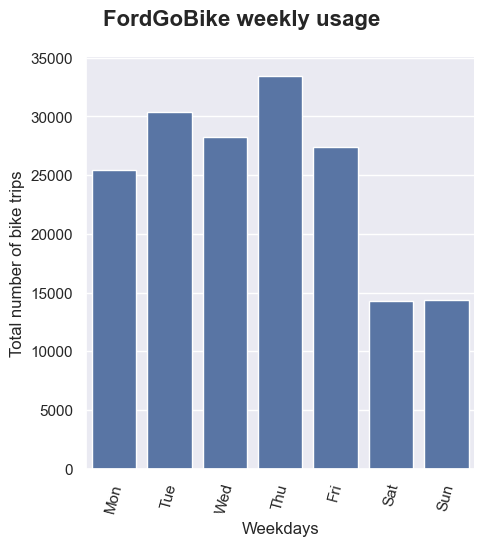

In [31]:
#--- Visualize this observation with a catplot using seaborn module

# Set the color palette to a standard one
base_color = sns.color_palette()[0]

#set order for plot values on x axis
week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


pop_weekday = sns.catplot(data=df_clean, x='weekday', kind='count', color=base_color, order = week_order)
pop_weekday.set_axis_labels('Weekdays','Total number of bike trips')
pop_weekday.fig.suptitle('FordGoBike weekly usage', y=1.05, fontsize=16, fontweight='bold')
pop_weekday.set_xticklabels(rotation=75)
plt.show()

### Observations:
>- Thursday appears to be the most popular day for ford bike riders
>- Weekends (Saturday and Sunday) record the lowest number for bike usage
>- A preliminary assumption for this low number on weekends could mean bikes are mainly used for commute on workdays.

## Univariate Question 2: What is the hourly pattern of usage for the bikes?

### Visualization

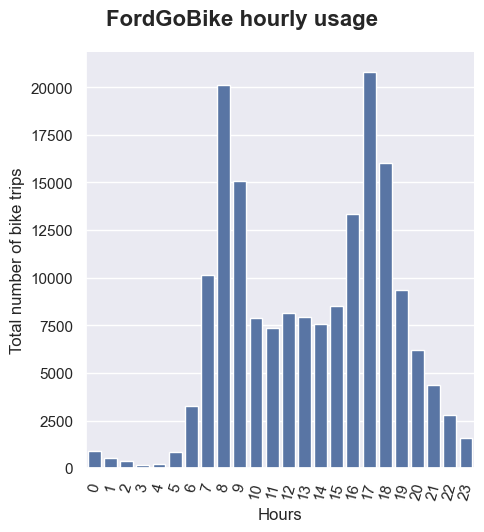

In [32]:
#Visualize the popular hours using catplot

pop_hour = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color=base_color)
pop_hour.set_axis_labels('Hours','Total number of bike trips')
pop_hour.fig.suptitle('FordGoBike hourly usage', y=1.05, fontsize=16, fontweight='bold')
pop_hour.set_xticklabels(rotation=75)
plt.show()

### Observations:
>- A bi-modal distribution is the pattern for hourly usage
>- Bike orders in the context of ride start time occurs mostly in the mornings (8-9am) and evenings(17 -18)
>- This could confirm earlier hypothesis of bike usage for work commutes during weekdays

## Univariate Question 3: What is the typical duration for bike rides (in minutes)

### Visualizations

In [33]:
df_clean['duration_min'].describe()

count    173467.000000
mean         11.242905
std          27.446221
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

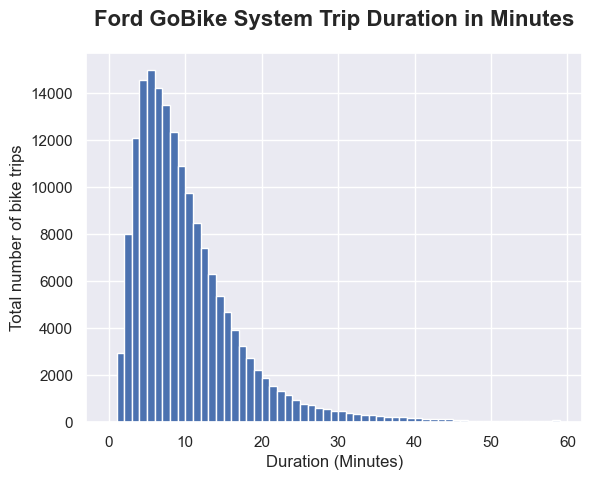

In [34]:
#To visualize the distribution: employ histogram plot

#set bin size using summary statistics from cell above
bin_edges = np.arange(0,60,1)

plt.hist(data=df_clean,x='duration_min',bins=bin_edges)
plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Total number of bike trips')
plt.show()

In [35]:
df_clean['duration_min'].describe()

count    173467.000000
mean         11.242905
std          27.446221
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

### Observations:
>- The histogram plot is skewed to the right. (suggesting short time bike rides is more common)
>- Typical duration for bike trip is between (5 to 12) minutes, can be further confirmed with statistical summary in cell above
>- An explanation for this could be short distances for commutes.

### Univariate Question 4: Which gender uses ford bikes more? Male or Female?

### Visualization

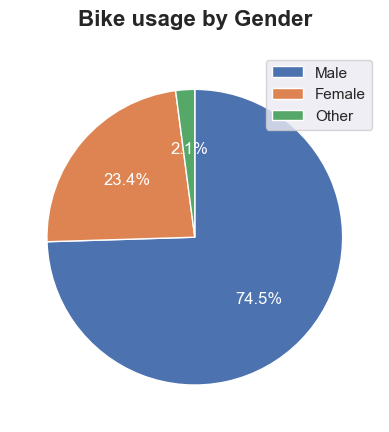

In [36]:
# Using a piechart to visualize the result
#reason for piechart: Perfect to compare small quantity of categorical variable

plt.pie(df_clean['member_gender'].value_counts(), 
        labels = df_clean['member_gender'].value_counts().index,
        startangle = 90,autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})

plt.title('Bike usage by Gender', y=1.05, fontsize=16, fontweight='bold');
plt.legend()

### Observations:
>- Men appear to be the most popular riders

### Univariate Question 5: Which age group uses ford bikes the most?

### Visualization

In [37]:
df_clean['member_age'].describe()

count    173467.000000
mean         33.825333
std           9.376947
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          64.000000
Name: member_age, dtype: float64

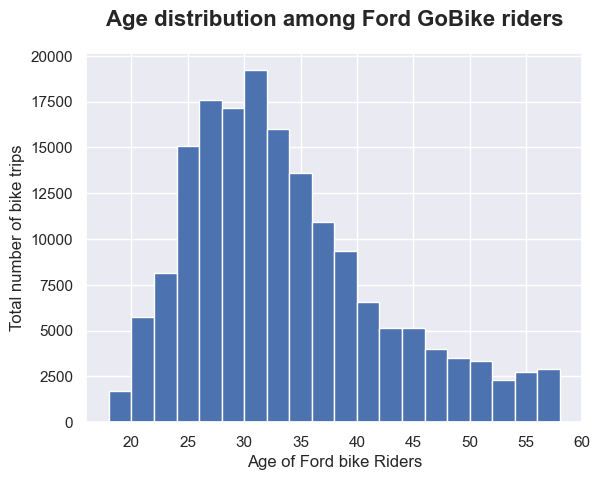

In [38]:
#To visualize the bike usage distribution by age: employ histogram plot

#set bin size using summary statistics from cell above
bin_edges = np.arange(18,60,2)

plt.hist(data=df_clean,x='member_age',bins=bin_edges)
plt.title("Age distribution among Ford GoBike riders", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Ford bike Riders')
plt.ylabel('Total number of bike trips')
plt.show()

### Observations: 
>- age group between (25years - 40years) appear to be the popular users
 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> To answer question 5 (Age distribution among riders) - It is to be noted that outlier ages above 64 were cleaned out during data cleaning stage to model the dataset appropriately

> Overall, there were no unusual points in the exploratory and Visualization phase.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- To tidy up the age distribution dataset, the summary statistics in that column showed that 99% of users were below the age of 64years, therefore, this helped to eliminate outlier ages.
>- Since the data visualized also shows that the popular age range for riders lied between (25 -40 years), this alteration did not alter the dataset much

## Bivariate Exploration

> In this section, I investigate the relationships between pairs of variables in the data. 
> The analysis is with a focus onthe different customer types (Subscriber member) or (Guest)

### Bivariate Exploration Question 1: What is the proportion of subscriber  vs customer ?

### Visualization

In [39]:
# Create separate dataframe to isolate subscriber_customer and customer to make comparison
#using pandas .query format

subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()

In [40]:
subscriber, customer

(156920, 16547)

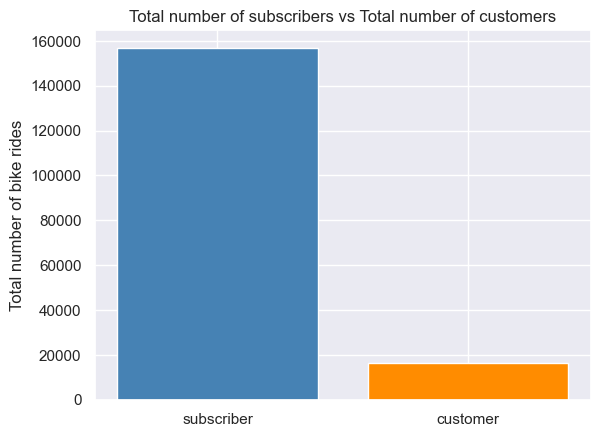

In [41]:
# To visulaize the result: employ bar chart

bar_colors = ['steelblue', 'darkorange']
x_bar = ['subscriber', 'customer']
y_bar = [subscriber, customer]
plt.title('Total number of subscribers vs Total number of customers')
plt.ylabel('Total number of bike rides')
plt.bar(x_bar, y_bar, color = bar_colors)
plt.show()

### Observation:
>- Comparison appears to be disproportionate in relation to total size of goford bike users
>- To further analyse; it would be helpful to express plots in terms of overall proportion

In [42]:
# Express subscriber and customer in terms of total goford bike rides

#guest customer proportion 
customer_prop = customer / df_clean['bike_id'].count()

#subscriber proportion
subscriber_prop = subscriber / df_clean['bike_id'].count()

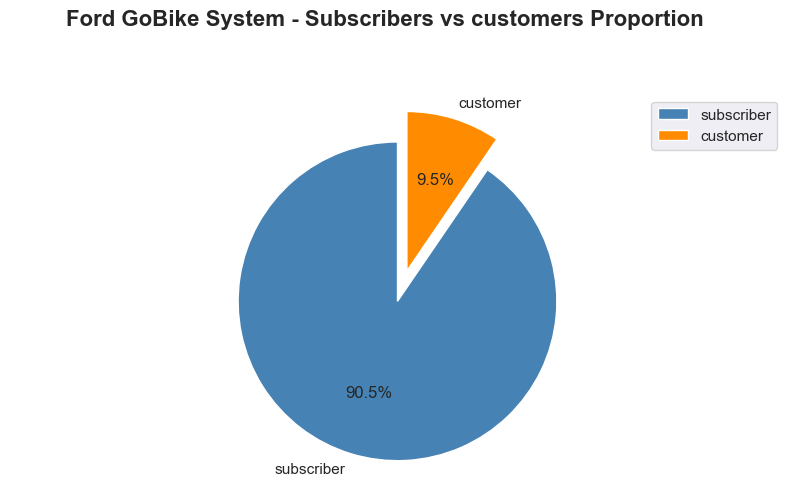

In [43]:
#To visualize the proportions: we employ pie chart

plt.figure(figsize=[10,5])
labels = ['subscriber','customer',]
sizes = [subscriber, customer]
explode = (0,0.2)
colors = ['steelblue','darkorange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend()
plt.suptitle('Ford GoBike System - Subscribers vs customers Proportion', y=1.05, fontsize=16, fontweight='bold')
plt.show()


### Observations:
>- It is further confirmed that subscribers form the majority of goford's bike system paying customer
>- Proportion sizes of subscriber = (90.5%) compared to customers (9.5%) 

### Bivariate Exploration Question 2: Which weekdays is more attractive for which customer types?

### Visualizations

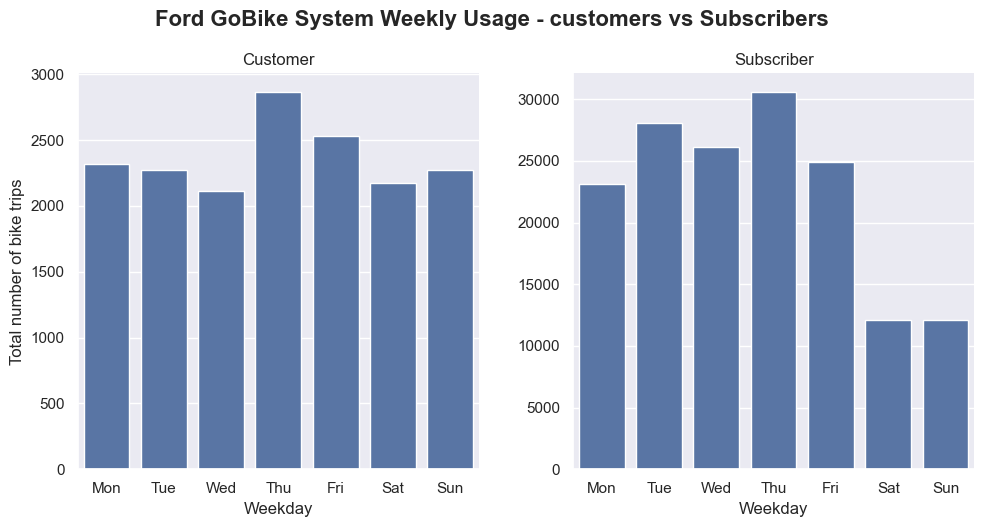

In [44]:
# In the attempt to find out which weekdays is popular amongst customer types
# Using seaborn's catplot to compare popular days amongst customer types

list_weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

customer_plot = sns.catplot(data=df_clean, x='weekday',
                            col='user_type',color = base_color,  order= list_weekday,
                            sharey= False, kind='count')

customer_plot.set_axis_labels('Weekday','Total number of bike trips')
customer_plot.set_titles("{col_name}")

plt.suptitle('Ford GoBike System Weekly Usage - customers vs Subscribers', y=1.05, fontsize=16, fontweight='bold');


### Observations:
>- From the plot results above, Thursdays appear to be the most popular days for both customer types
>- For the **customers**, there appears to be more bike activity on the **weekends** in proportion to other days when compared to the regular subscribers
>- The above observation might suggest that the **customers may be tourists who need to bike on weekends** and in contrast to the subscribers who only bike for work commute on weekdays

### Bivariate Exploration Question 3: Further investigation into weekly usage by both customer types

#### Visualization

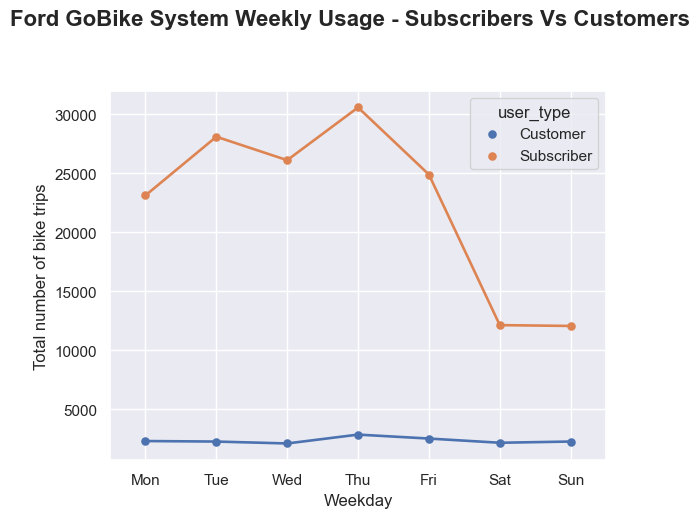

In [45]:
# Zoom in on weekly usage by both customer type using line chart to compare

#create dataframe to isolate usertype and weekdays using .groupby function
df_clean_weekly_use = df_clean.groupby([ 'user_type', 'weekday']).size().reset_index()


ax = sns.pointplot(data=df_clean_weekly_use, x='weekday', y=0, hue = 'user_type', scale=.7, order = list_weekday);

plt.suptitle('Ford GoBike System Weekly Usage - Subscribers Vs Customers', y=1.05, fontsize=16, fontweight='bold');
plt.xlabel('Weekday')
plt.ylabel('Total number of bike trips');
plt.grid(axis = 'x')

#### Observations:
>- From the zoomed in version of the weekly usage pattern amongst the customer types, more details about the usage difference is visible with the line plot
>- There is a clear contrast in the usage of the customer type when viewes with the line plot compared to the barchart used in earlier visualization

### Bivariate Exploration Question 4: What is the pattern for length of ride time amongst the customer types?

#### Visualization

In [46]:
df_clean['duration_min'].describe()

count    173467.000000
mean         11.242905
std          27.446221
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

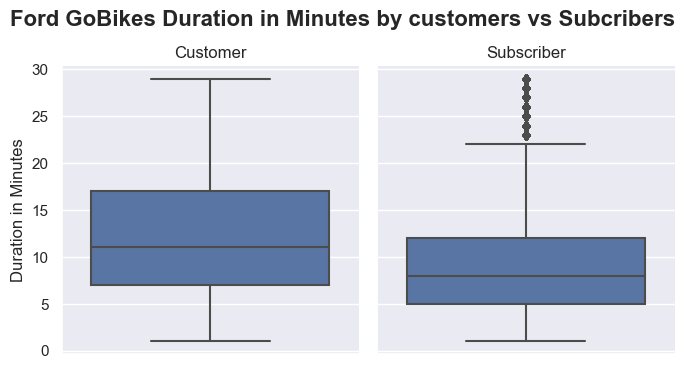

In [47]:
# Using a box plot, visualize the different ride duration patterns

#first isolate duration in minutes column using .query
#using summary statistics in cell above, to limit duration range to explore 
duration_data = df_clean.query('duration_min < 30')
x = sns.catplot(data= duration_data, y='duration_min', col="user_type", kind='box', height=3.5, aspect=1)
x.set_titles(col_template = '{col_name}')
x.set_axis_labels("", "Duration in Minutes")
x.fig.suptitle('Ford GoBikes Duration in Minutes by customers vs Subcribers',
               y=1.05, fontsize=16, fontweight='bold')
plt.show()

#### Observations:
>- From plots above, It appears that the customers take longer on the bike rides (average over 10 minutes) when compared to the subscribers at average of under 10 minutes.
>- Typical ride duration for the guest customer type is around (8 - 18) minutes, while the subscribers ride for duration range of about (5- 12) minutes

### Bivariate Exploration Question 5: Age distribution of customer types

#### Visualizations

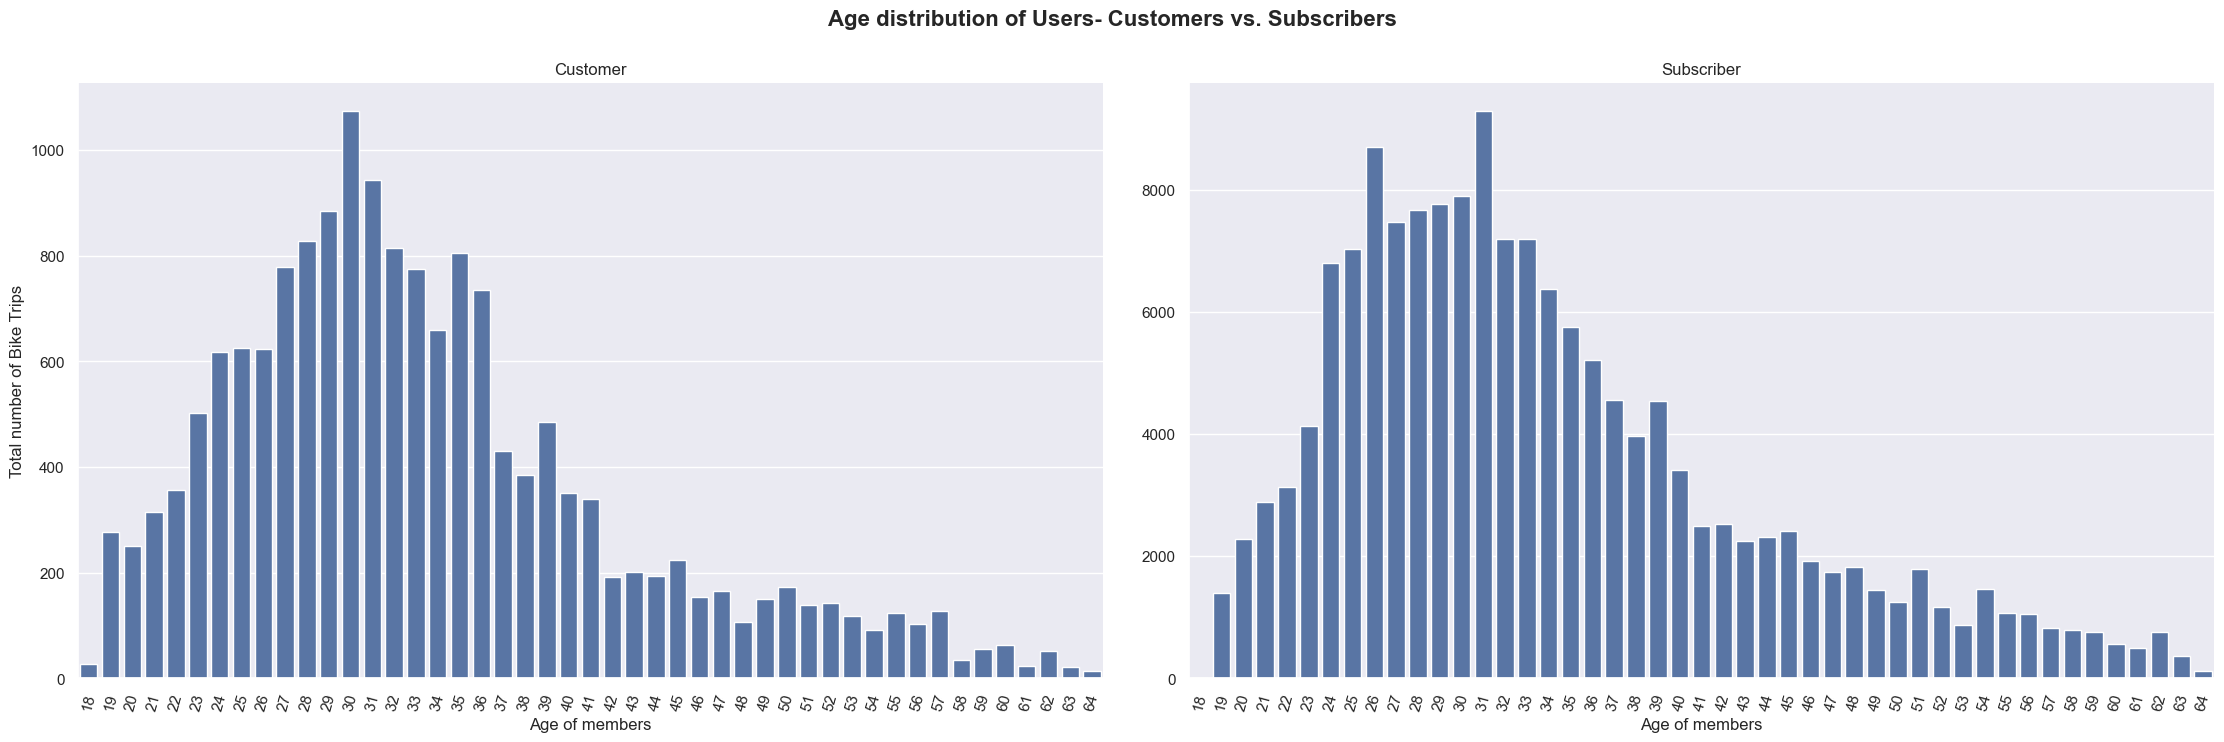

In [48]:
#Employing a count plot in seaborn to visualize the age distribution

age_distr_plot = sns.catplot(data=df_clean, x = 'member_age', col='user_type', 
                            kind='count', sharey = False, 
                            color = base_color, height=7, aspect=1.6);

age_distr_plot.set_axis_labels('Age of members', 'Total number of Bike Trips')
age_distr_plot.set_titles('{col_name}')

age_distr_plot.fig.suptitle('Age distribution of Users- Customers vs. Subscribers',
                            y=1.05, fontsize=16, fontweight='bold')

age_distr_plot.set_xticklabels(rotation=75)

plt.show()

#### Observations:
>- Both plots show that majority of users in both customer types are betwen the ages of 24 - 35 years 
>- There appears to be more of the older population (ages > 50) in the subscribers domain

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - With the focus on analysing different features in the context of the two different users/ paying customers of the system, the usage pattern is a little more clear. With subscribers taking short distance rides with shorter ride durations and mostly during the weekdays, in contrast to the regular customer.

> - Therefore, this might suggest that the usage behaviour for the customer is typical of tourists while the subscibers are residents who mostly employ the bikes for work commute. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - For now, apart from ride duration and distances, not much can be concluded yet regarding other features. 

## Multivariate Exploration

> In this section, relationships between three or more variables are investigated to dive deeper into the your data.

### Multivariate Exploration Question 1: Exploring relationship between Gender and Customer type

#### Visualization

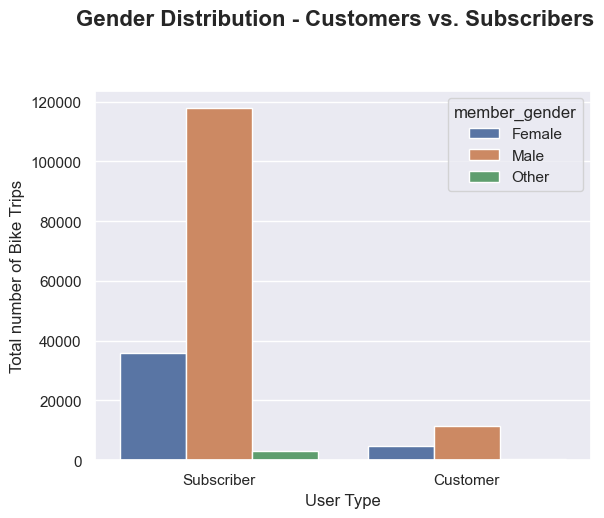

In [49]:
#Employ count plot in seaborn to visualize gender distribution among customer types

#plt.figure(figsize = [8, 5])

plot_order = df_clean['user_type'].value_counts().index

gender_cust_plot = sns.countplot(data=df_clean, x='user_type', hue='member_gender',
                                 order = plot_order )

gender_cust_plot.set_xlabel('User Type')
gender_cust_plot.set_ylabel('Total number of Bike Trips')

plt.suptitle('Gender Distribution - Customers vs. Subscribers', 
             y=1.05, fontsize=16, fontweight='bold');


#### Observations:
>- Male riders dominate the system in both customer categories
>- Distribution of gender in the customer section is almost equal

### Multivariate Exploration Question 2: Which gender take the longer bike rides amongst customer types?

#### Visualization:

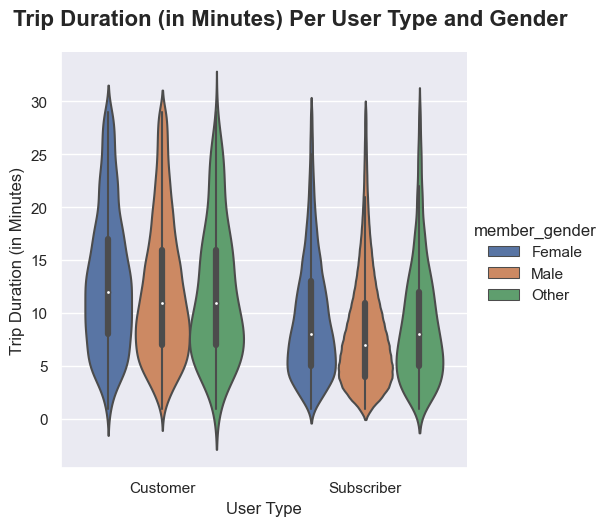

In [50]:
# Using a violin plot to visualize statistical summary data for the 3 variables to be analysed
#using ('duration_data') defined above in bivariate visualization for duration below (30 minutes)

gender_bike_length = sns.catplot(data=duration_data, x='user_type', y="duration_min", 
                                 hue="member_gender", kind="violin");

gender_bike_length.set_axis_labels("User Type", "Trip Duration (in Minutes)")

gender_bike_length.fig.suptitle('Trip Duration (in Minutes) Per User Type and Gender', 
                                y=1.05, fontsize=16, fontweight='bold')
plt.show()

#### Observations:
>- In both cases, the plot show that females take longer trips as indicated by the median (represented by white dot)
>- In both cases, the males have the highest frequency of rides; as indicated by the width of the violin plot showing the high density of rides with duration at around  (5 - 10 mins)

###  Multivariate Exploration Question 3: Gender Weekly usage pattern for both customer types ?

#### Visualization

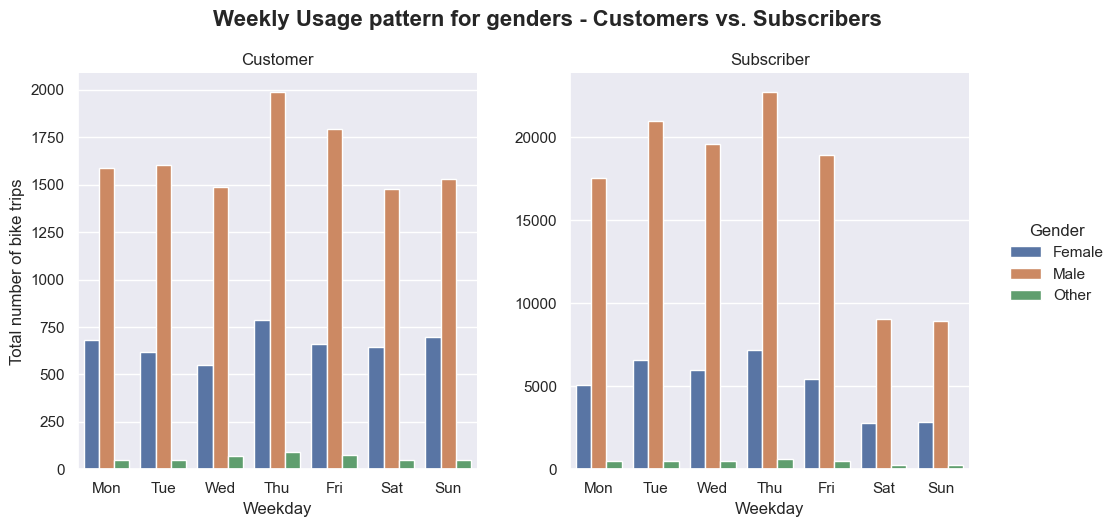

In [51]:
# Employing count plot in seaborn to visualize pattern for weekly usage

gender_weekly_plot = sns.catplot(data=df_clean, x='weekday', col='user_type',
                hue='member_gender', order = list_weekday, sharey=False, kind='count')

gender_weekly_plot.set_axis_labels('Weekday','Total number of bike trips')
gender_weekly_plot.set_titles("{col_name}")
gender_weekly_plot._legend.set_title('Gender')

plt.suptitle('Weekly Usage pattern for genders - Customers vs. Subscribers', 
             y=1.05, fontsize=16, fontweight='bold')
plt.show()



#### Observation:
>- In both customer type sections, the males have highest number of usage weekly as expected
>- Outside of the above observation, no other unique patterns can be identified from the plot

### Multivariate Exploration Question 4: Hourly usage patterns in the weekdays for customer types with heatmap 

#### Visualization

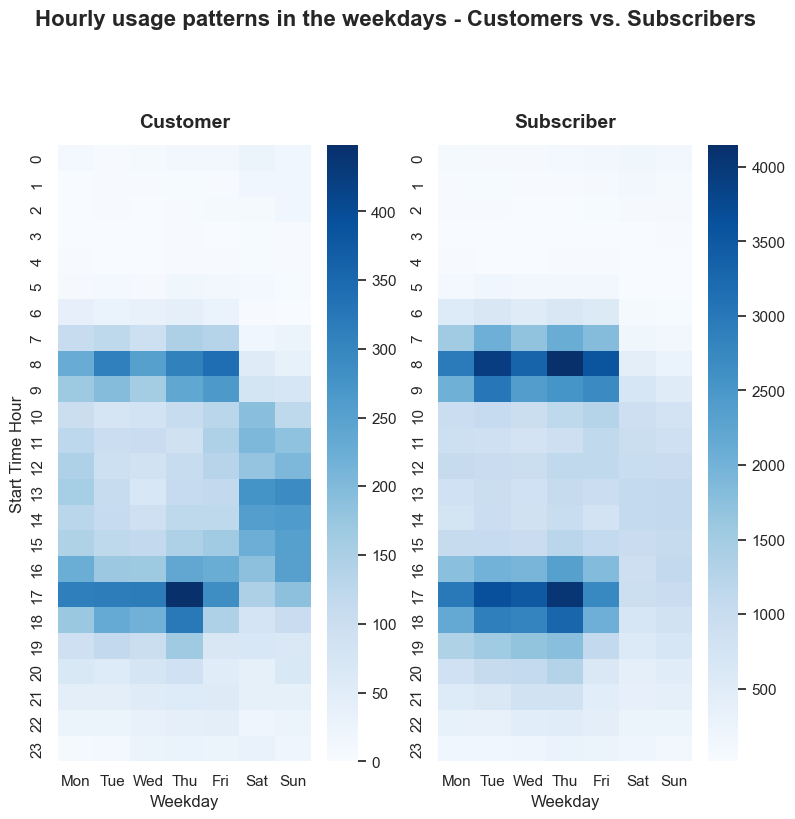

In [52]:
# Employing heatmaps to visualize the hourly usage patterns

# First set the order for weekday using .categorical function
df_clean['weekday'] =  pd.Categorical(df_clean['weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage patterns in the weekdays - Customers vs. Subscribers', 
             y=1.05, fontsize=16, fontweight='bold');


#Now divide the heatmap plots using subplots for customer and subscriber segments

plt.subplot(1,2,1)

#create dataframe to isolate customer data for weekday, start time and number of bike trips
customer_df = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "weekday"])["bike_id"].size().reset_index()

#using .pivot function to reshape above dataframe in order by column values specified
customer_df = customer_df.pivot('start_time_hour','weekday','bike_id')

#Make heat map plot for customer
sns.heatmap(customer_df, cmap= 'Blues')
plt.title("Customer", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')


#Make heat map plot for Subscribers

plt.subplot(1,2,2)

#create dataframe to isolate subscriber data for weekday, start time and number of bike trips
subscriber_df = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "weekday"])["bike_id"].size().reset_index()
subscriber_df = subscriber_df.pivot('start_time_hour','weekday','bike_id')
sns.heatmap(subscriber_df, cmap= 'Blues')
plt.title("Subscriber", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('')

plt.show()

#### Observations:
>- Mornings and Evenings see the highest demand for bike rides among both customer groups
>- Heat map plot above confirms the discrepancy of bike rides on weekends for both customer groups. (More activity on the weekend for the customers compared to less for the subscribers). 
>- The heatmap plotted gives an overall and summarized look at the trend for usage behaviour across both user categories

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Through various visualizations and the inclusion of more factors to compare to other variables, this portion improved the data exploration subjects covered in the earlier sections. 

>The time-based discussion of when and what time each user group utilizes the bike sharing system took on new meaning after plotting a heatmap of demand for the bikes throughout the day on a weekly basis.

### Were there any interesting or surprising interactions between features?

> No major surprises. However an interesting feature to note was the longer ride duration for females compared to males. 

> Without this data exploratory phase, the above observation might not have been imagined, given the proportion of riders. but the data told the truth.

## Conclusions

### Project Steps
>- The data exploratory phase included a workflow that involved data gathering, wrangling and cleaning to have a uniform and tidy dataset for analysis.
>- Questions were posed first and then answered by visualization plots using matplotlib and seaborn libraries

### Main findings

>- Thursday is most popular day for bike rides in the system
>- Average short distance and short ride duration suggest rides majorly used for work commute; further buttressed by low demand for rides on weekends
>- More than 90% of the system users subscribe to the service
>- Age group between (25years - 40years) appear to be the popular users
>- Even though males dominate the numbers in terms of usage, females actually ride the longest times.

### References

>- FordGoBike Data Set: https://www.lyft.com/bikes/bay-wheels/system-data
>- matplotlib Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
>- seaborn catplot: https://seaborn.pydata.org/generated/seaborn.catplot.html
>- Stackoverflow pages to debug errors

